In [1]:
import h5py
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import glob
import os
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv to append the data and reset index
path = '/content/drive/MyDrive/goodbaddatanewbalanced.csv'
masterdata = pd.read_csv(path,sep='\t')
masterdata = masterdata.drop(['Unnamed: 0'], axis = 1)

In [4]:
df = masterdata

In [5]:
ff = masterdata[(masterdata['Tool'] == 'OP01') & (masterdata['Machine'] == 'M01')& (masterdata['Condition'] == 'good') & (masterdata['Repeat'] == 4)]
ff = ff.reset_index(drop = True)

In [20]:
import pywt
new_signal = []
w = pywt.Wavelet ('dmey')
level = 3
data = pd.DataFrame()
data['X'] = ff['X'].values[1000: 2000]
data_wave = data['X'].values
wp = pywt.WaveletPacket(data_wave,w, maxlevel = level) # Wavelet packet transformation
packet_names = [node.path for node in wp.get_level(level, "natural")]
packet_names
for v in range(len(packet_names)):
  new_wp = pywt.WaveletPacket(data = None , wavelet = w , maxlevel = level)
  new_wp[packet_names[v]] = wp[packet_names[v]].data
  reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
  new_signal.append(reconstructed_signal)

In [30]:
for v in range(len(new_signal)):
  print(v) 

0
1
2
3
4
5
6
7


In [ ]:
plt.plot(data_wave)

<function matplotlib.pyplot.show(close=None, block=None)>

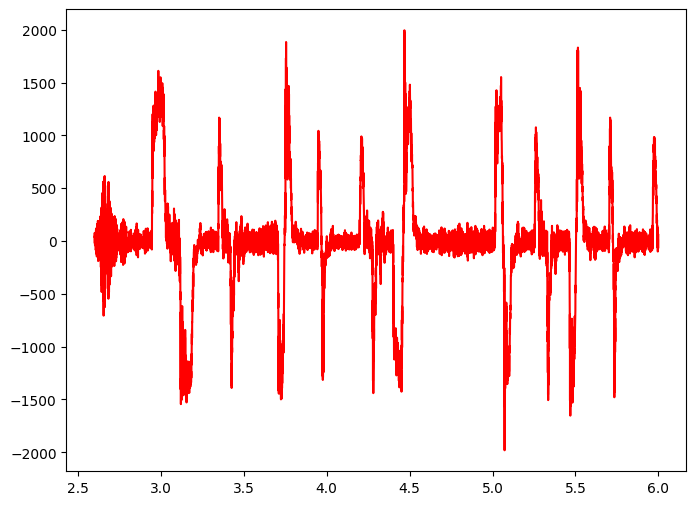

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df['Time (s)'],df['X'], '-r')
plt.show

# FFT 

In [ ]:
from scipy.fftpack import fft, ifft
sr = 2000

In [ ]:
t = df['Time (s)'].values
x = df['X'].values

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

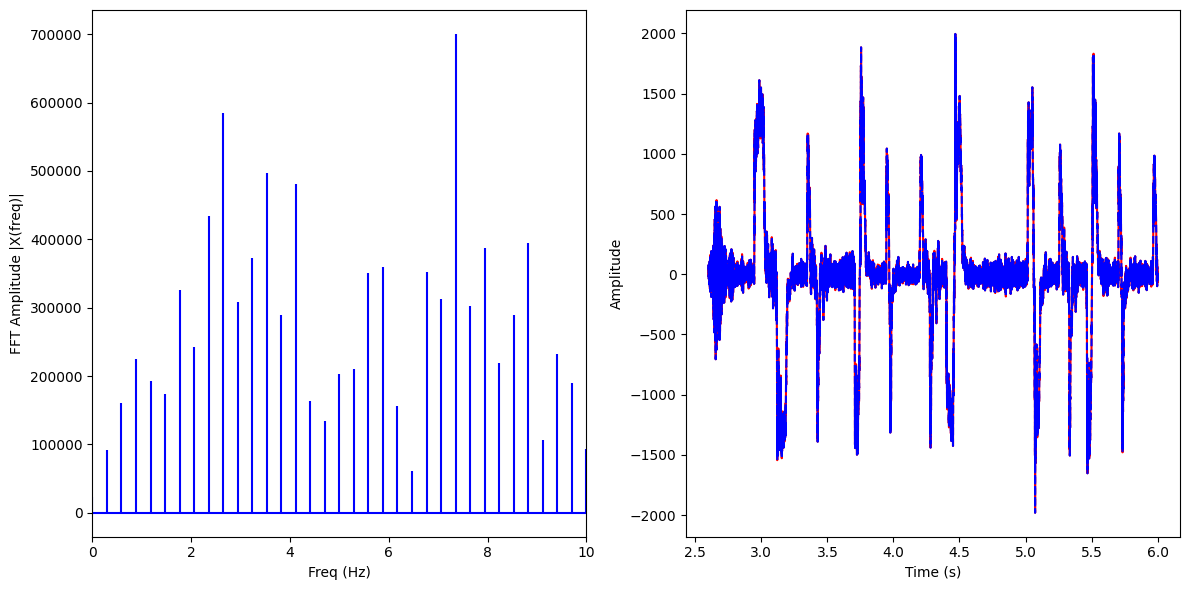

In [ ]:
#Ploting the signals
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b',markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.plot (t, df['X'].values,'--b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Discrete Wavelet Analysis

In [ ]:
import pywt

In [ ]:
w  = pywt.Wavelet ('db4')

In [ ]:
x.shape

(6799,)

In [ ]:
cA,cD = pywt.dwt(x,w)
#coeffs = pywt.wavedec(x, w, level=2)
#coeffs[0]

In [ ]:
cA[0]

-16.009458767054426

In [ ]:
#y = pywt.idwt(cA,cD,w)
y = pywt.waverec(coeffs,w)

In [ ]:
t.shape

(6799,)

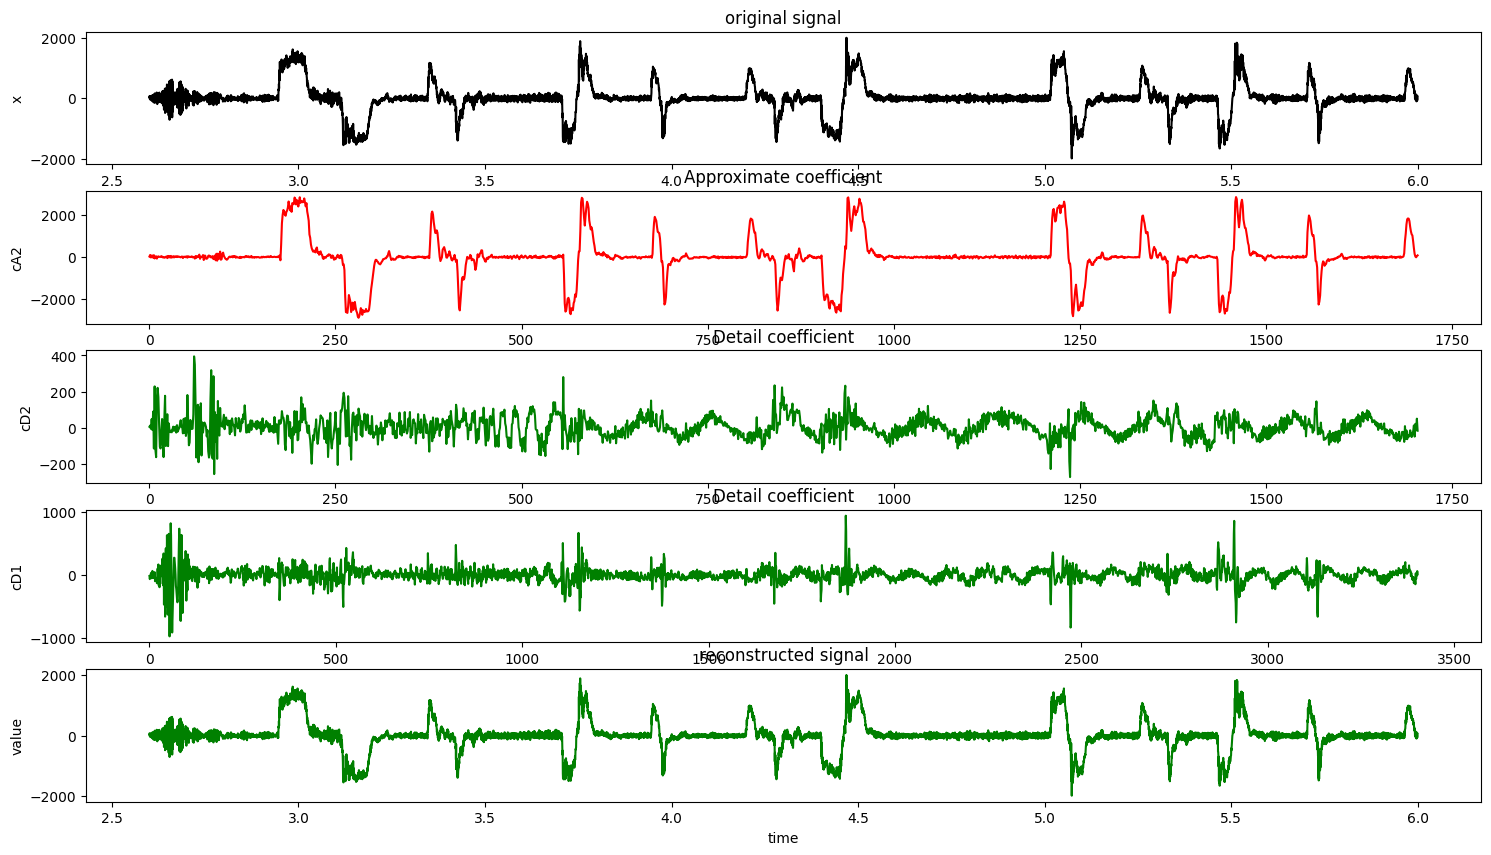

In [ ]:
#Ploting the signals
plt.figure(figsize = (18, 10))
plt.subplot(5,1,1)
plt.plot(t, x, 'k',)
plt.xlabel('time (s)')
plt.ylabel('x')
plt.title ('original signal')
#plt.xlim(0, 10)

plt.subplot(5,1,2)
plt.plot(coeffs[0], 'r')
plt.xlabel('samples')
plt.ylabel('cA2')
plt.title ('Approximate coefficient')

plt.subplot(5,1,3)
plt.plot(coeffs[1], 'g')
plt.xlabel('samples')
plt.ylabel('cD2')
plt.title ('Detail coefficient')

plt.subplot(5,1,4)
plt.plot(coeffs[2], 'g')
plt.xlabel('samples')
plt.ylabel('cD1')
plt.title ('Detail coefficient')

plt.subplot(5,1,5)
plt.plot(t,y[0:6799], 'g')
plt.xlabel('time')
plt.ylabel('value')
plt.title ('reconstructed signal')

plt.show()